In [13]:
import pandas as pd
import plotly.express as px
from datetime import datetime 

[Istat Serie Storiche]("http://seriestoriche.istat.it/index.php?id=1&no_cache=1&tx_usercento_centofe%5Bcategoria%5D=7&tx_usercento_centofe%5Baction%5D=show&tx_usercento_centofe%5Bcontroller%5D=Categoria&cHash=1b020e5419ca607971010a98271e3209")

[Data set link (in xls)]("http://seriestoriche.istat.it/fileadmin/documenti/Tavola_7.3.xls")

In [29]:
url = 'https://raw.githubusercontent.com/okHotel/ssd_project/master/data_set/microsoftstockprice.csv'
df1 = pd.read_csv(url)
print(df1.head())

         date   close      volume     open     high      low
0  2018/09/04  111.71  22558040.0  110.850  111.955  110.220
1  2018/08/31  112.33  23217310.0  111.685  112.777  111.515
2  2018/08/30  111.95  22759640.0  111.670  112.610  111.440
3  2018/08/29  112.02  20747500.0  110.450  112.030  110.270
4  2018/08/28  110.26  19144860.0  109.940  110.500  109.790


In [30]:
df1 = df1[['date', 'close']]
#df1.sort_values(by='date', inplace=True, ascending=True)
print(df1.head())

         date   close
0  2018/09/04  111.71
1  2018/08/31  112.33
2  2018/08/30  111.95
3  2018/08/29  112.02
4  2018/08/28  110.26


In [31]:
fig = px.line(df1, x = 'date', y = 'close', title='Microsoft stock price trend')
fig.show()

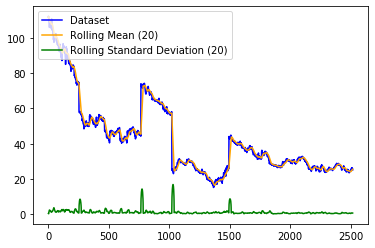

In [32]:
rmean = df1.close.rolling(window=20, min_periods=1).mean() #calcolo la media mobile
rstd = df1.close.rolling(window=20, min_periods=1).std() #calcolo la deviazione standard mobile

import matplotlib.pyplot as plt
plt.plot(df1.close, color='blue', label='Dataset')
plt.plot(rmean, color='orange', label='Rolling Mean (20)')
plt.plot(rstd, color='green', label='Rolling Standard Deviation (20)')
plt.legend(loc='upper left')
plt.show()

In [33]:
df1['rmean'] = rmean
df1['rstd'] = rstd
df1[:10]

,date,close,rmean,rstd
0,2018/09/04,111.71,111.710000,NaN
1,2018/08/31,112.33,112.020000,0.438406
2,2018/08/30,111.95,111.996667,0.312623
3,2018/08/29,112.02,112.002500,0.255522
4,2018/08/28,110.26,111.654000,0.810080
5,2018/08/27,109.60,111.311667,1.108213
6,2018/08/24,108.40,110.895714,1.494845
7,2018/08/23,107.56,110.478750,1.818299
8,2018/08/22,107.06,110.098889,2.047336
9,2018/08/21,105.98,109.687000,2.328600


In [34]:
import numpy as np
means =np.concatenate(([0], df1.rmean.values.copy())) # creo l'array delle prevsioni con la prima = 0 e scifto tutti gli altri di 1
means = np.resize(means, means.size - 1) #elimino l'ultimo elemento
df1['Prev'] = means #ogni dato è la media mobile calcolata sul dato precedente
#df1.head()

In [35]:
stds = np.nan_to_num(np.concatenate(([0], df1.rstd.copy()))) #creo l'array traslato di 1 delle deviazioni standard
stds = np.resize(stds, stds.size-1) #elimino l'utlimo elemento
df1['Dev Standard'] = stds 
#df1.head()

In [36]:
df1['LowerBound'] = df1['Prev'] - df1['Dev Standard'] #lower bound del range entro il quale il dato reale dovrebbe cadere
#df1.head()

In [37]:
df1['UpperBound'] = df1['Prev'] + df1['Dev Standard'] #upper bound del range entro il quale il dato reale dovrebbe cadere
df1.head()

,date,close,rmean,rstd,Prev,Dev Standard,LowerBound,UpperBound
0,2018/09/04,111.71,111.710000,NaN,0.000000,0.000000,0.000000,0.000000
1,2018/08/31,112.33,112.020000,0.438406,111.710000,0.000000,111.710000,111.710000
2,2018/08/30,111.95,111.996667,0.312623,112.020000,0.438406,111.581594,112.458406
3,2018/08/29,112.02,112.002500,0.255522,111.996667,0.312623,111.684043,112.309290
4,2018/08/28,110.26,111.654000,0.810080,112.002500,0.255522,111.746978,112.258022


In [38]:
pred = (df1['close'] >= df1['LowerBound']) & (df1['close'] <= df1['UpperBound']) #predicato per verificare se il dato è dentro al range
df1['c'] = np.where(pred, '0', '1') #predicato soddisfatto mette 0 altrimenti 1
df1.head()

,date,close,rmean,rstd,Prev,Dev Standard,LowerBound,UpperBound,c
0,2018/09/04,111.71,111.710000,NaN,0.000000,0.000000,0.000000,0.000000,1
1,2018/08/31,112.33,112.020000,0.438406,111.710000,0.000000,111.710000,111.710000,1
2,2018/08/30,111.95,111.996667,0.312623,112.020000,0.438406,111.581594,112.458406,0
3,2018/08/29,112.02,112.002500,0.255522,111.996667,0.312623,111.684043,112.309290,0
4,2018/08/28,110.26,111.654000,0.810080,112.002500,0.255522,111.746978,112.258022,1


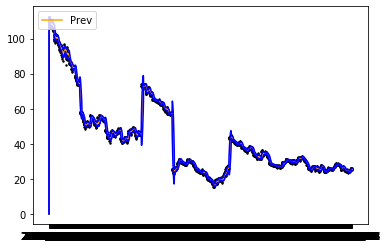

In [39]:
plt.plot(df1.Prev, color='orange', label='Prev')
plt.plot(df1.LowerBound, color='blue')
plt.plot(df1.UpperBound, color='blue')
plt.scatter(df1.date, df1.close, color='black', s=2)
plt.legend(loc='upper left')
plt.show()